In [1]:
import xarray as xr
import pandas as pd
from utilities.plotting import *
from utilities.utils import *

In [ ]:

lat_bands, colors = plot_lat_bands(get_world())
gas_costs=[10, 50, 1000, 10000]
for var in [ 'storage_ratio']:
    latitude_df = pd.DataFrame()
    for gas_cost in gas_costs:
        store_results_map('CSP_storage', gas_cost, var)
        masked_dataset = mask_data_world(xr.open_dataset(f'output_data/cfs_mean/{var}_CSP_storage_gas{gas_cost}.nc'), get_world())
        latitude_df = calculate_lat_band_mean(latitude_df, masked_dataset, lat_bands, gas_cost)

    plot_line(latitude_df, colors)

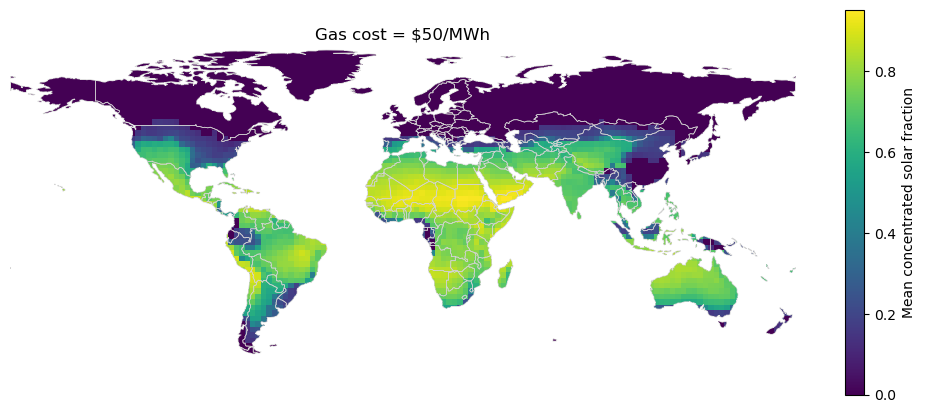

In [3]:
plot_result_map('output_data/cfs_mean/cs_fraction_CSP_storage_gas50.nc', 'CSP_storage', 'Gas cost = $50/MWh', 'Mean concentrated solar fraction')

In [ ]:
# Print cells with charging time > 100 h
data = xr.open_dataset('output_data/cfs_mean/storage_ratio_CSP_storage_gas10.nc')
data = data.where(data['breakeven_cost'] > 100, drop=True)

# print the cells with charging time > 100 such that I can see which lon lat has which charging time
# Extract coordinate pairs
lon = data['x'].values
lat = data['y'].values

# Print as pairs
for lo in lon:
    for la in lat:
        if not np.isnan(data.sel(x=lo, y=la)['breakeven_cost'].values):
            print(f"lon: {lo}, lat: {la}, charging time: {data.sel(x=lo, y=la)['breakeven_cost'].values}")

lon: -98.875, lat: 73.125, charging time: 117.77214865680547
lon: -96.375, lat: 78.125, charging time: 117.31346049611483
lon: -93.875, lat: 78.125, charging time: 131.0636952576901
lon: -86.375, lat: 80.625, charging time: 111.20183236529444
lon: -81.375, lat: 80.625, charging time: 128.80294745340663
lon: -68.875, lat: 73.125, charging time: 100.32667525373894
lon: -66.375, lat: 78.125, charging time: 126.07164640798527
lon: -63.875, lat: 78.125, charging time: 125.35889606874154
lon: -63.875, lat: 80.625, charging time: 105.68784999653228
lon: -61.375, lat: 80.625, charging time: 118.5400204491521
lon: -58.875, lat: 78.125, charging time: 129.23472028780228
lon: -58.875, lat: 80.625, charging time: 130.28107121970194
lon: -53.875, lat: 73.125, charging time: 101.77753303242768
lon: -53.875, lat: 80.625, charging time: 114.48746873519826
lon: -51.375, lat: 80.625, charging time: 114.8847791565538
lon: -48.875, lat: 65.625, charging time: 102.91763292096722
lon: -46.375, lat: 78.125, 

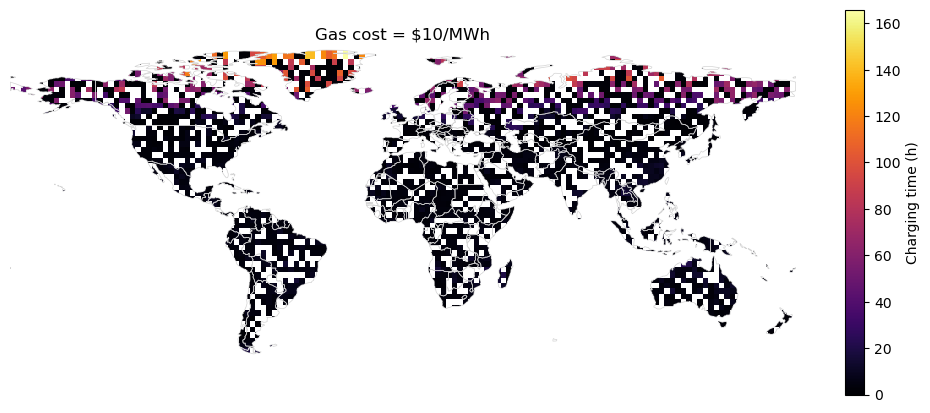

In [5]:
plot_result_map('output_data/cfs_mean/storage_ratio_CSP_storage_gas10.nc', 'CSP_storage', 'Gas cost = $10/MWh', 'Charging time (h)')
